<h1 style="text-align:center">Preentrega 1 - Data Science I: Fundamentos para la Ciencia de Datos</h1>
<h2 style="text-align:center">Loan Default Classification Problem 💸</h2>

* **Alumno:** González Kapnik, Juan Manuel

* **Profesor:** Rodriguez, Germán

* **Comisión:** 61750

* **Fecha de entrega:** 22/12/2024

Dataset extraido de [Kaggle](https://www.kaggle.com/datasets/yasserh/loan-default-dataset/data) bajo la CC0 1.0 Universal license.

<h3 style="text-align:center">Primera Parte: Validación de Dataset ✔️</h3>

**Descripción de Librerias**
* **Pandas.** Ampliamente utilizada para el análisis y manipulación de datos. Proporciona estructuras de datos flexibles como DataFrame y Series, que facilitan la manipulación, limpieza y análisis de conjuntos de datos tabulares.
* **Numpy.** Fundamental para la computación científica en Python. Ofrece soporte para arrays multidimensionales y una amplia gama de funciones matemáticas para operar sobre estos arrays de manera eficiente. 
* **Matplotlib.pyplot.** Librería de visualización de datos en Python. Con matplotlib.pyplot, puedes crear gráficos estáticos como líneas, barras, dispersión, histogramas, entre otros. Es una herramienta esencial para la visualización de datos.
* **Seaborn.** Proporciona una interfaz de alto nivel para crear gráficos estadísticos atractivos y de alta calidad. Es especialmente útil para visualizar distribuciones, relaciones y correlaciones entre variables.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [60]:
df = pd.read_csv('../data/raw/Loan_Default.csv')

In [61]:
df.head() # Primeras 5 filas

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [62]:
df.info() # Resumen de las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [63]:
df.shape # Número de filas y columnas

(148670, 34)

In [64]:
df.describe() # Columnas numéricas

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [65]:
df.describe(include='object') # Columnas categóricas

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
count,145326,148670,147762,148670,148536,148670,148670,148670,148549,148670,148670,148670,148670,148670,148670,148670,148670,148470,148470,148670,148670
unique,2,4,2,3,4,2,2,2,2,2,2,2,3,2,4,4,2,7,2,4,2
top,cf,Male,nopre,type1,p3,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,CIB,CIB,45-54,to_inst,North,direct
freq,135348,42346,124621,113173,55934,142344,148114,127908,133420,141560,145286,148637,138201,148637,146480,48152,74392,34720,95814,74722,148637


In [66]:
df.nunique() # Numero de valores únicos por columna

ID                           148670
year                              1
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     211
rate_of_interest                131
Interest_rate_spread          22516
Upfront_charges               58271
term                             26
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
property_value                  385
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                         1001
credit_type                       4
Credit_Score                    401
co-applicant_credit_type          2
age                         

In [67]:
df.isnull().sum() # Número de valores nulos por columna

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

<h3 style="text-align:center">Observaciones Primera Parte 💡</h3>

* El conjunto de datos contiene 34 columnas, de las cuales 21 son categóricas y 13 numéricas. Hay 126.369 filas en el conjunto de datos.
* _Status_ es la variable objetivo, donde se muestran dos clases de estado de impago del préstamo. (0 - No impagado, 1 - Impagado).
* La columna ID contiene los números de identificación de cada registro.
* _year_ sólo tiene un valor, 2019. Nuestro conjunto de datos se basa en los registros de préstamos del año 2019.
* Faltan valores en 14 columnas, que tendremos que tratar en las secciones siguientes.

<h3 style="text-align:center">Segunda Parte: Distribución de Status (Target) 🎯</h3>

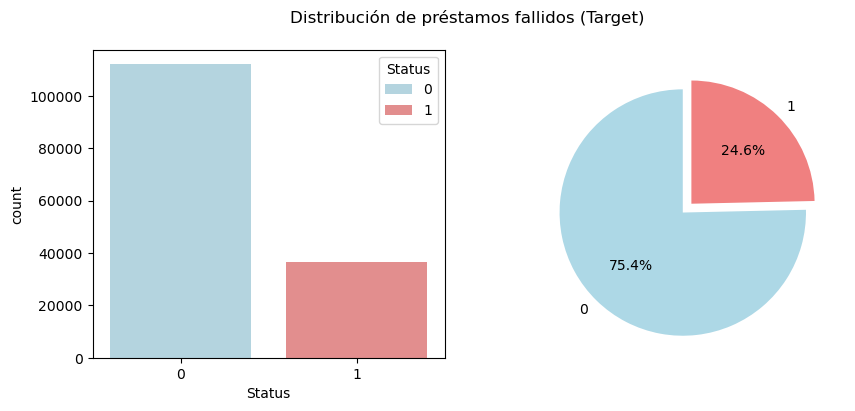

Porcentaje de incumplimientos: 24.645%


<Figure size 640x480 with 0 Axes>

In [68]:
status_counts = df['Status'].value_counts()
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.countplot(data=df, x='Status', hue = 'Status',  palette=['lightblue', 'lightcoral'])
plt.subplot(1,2,2)
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90,
        colors=['lightblue', 'lightcoral'], explode = [0.1,0])
plt.suptitle('Distribución de préstamos fallidos (Target)')

plt.show()
plt.savefig('../reports/figures/0. Distribución de préstamos fallidos (Target).svg')

print(f"Porcentaje de incumplimientos: {(df['Status'].sum()/df.shape[0])*100:.3f}%")

<h3 style="text-align:center">Observaciones Segunda Parte 💡</h3>

* El objetivo de este proyecto es construir un modelo ML que pueda predecir si un deudor va a pagar o no su préstamo. 
* En nuestro conjunto de datos de entrenamiento, observamos que aproximadamente el 25% de los prestatarios han dejado de pagar sus préstamos. Esto indica que los impagos de préstamos no son infrecuentes, y un modelo predictivo podría aportar un valor sustancial a las instituciones financieras ayudándolas a identificar a los prestatarios de alto riesgo en una fase temprana del proceso.
* Además, podría estudiarse el desequilibrio de la variable objetivo, ya que podría influir en el comportamiento del modelo.

<h3 style="text-align:center">Tercera Parte: Analisis de  variables numéricas 🔎</h3>

In [69]:
num_cols_wop_target = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

In [70]:
num_cols_wop_target.remove('Status') # Target
num_cols_wop_target.remove('ID') # ID no contribuye al modelo
num_cols_wop_target.remove('year') # Según las observaciones de la Primera Parte, solo contiene un valor

In [71]:
num_cols_w_target = num_cols_wop_target + ['Status']

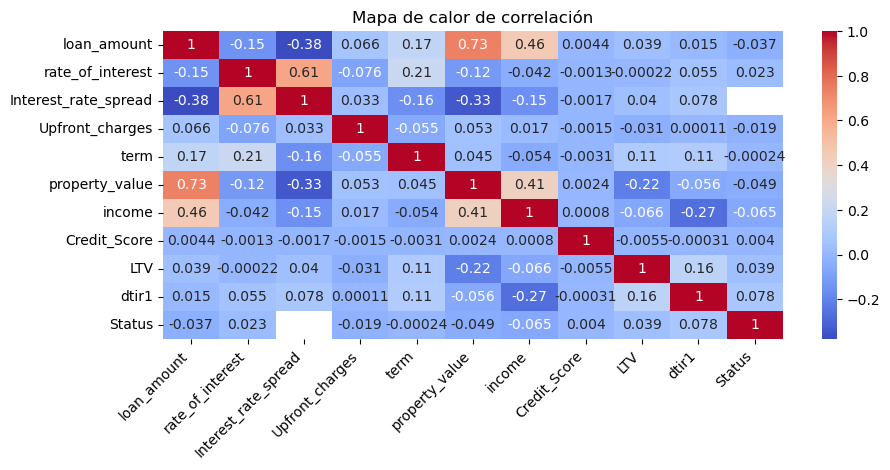

In [72]:
correlation_matrix = df[num_cols_w_target].corr()

plt.figure(figsize=(10,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Mapa de calor de correlación')
plt.savefig('../reports/figures/1. Mapa de calor de correlación.svg')
plt.show()

In [73]:
correlation_matrix

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1,Status
loan_amount,1.000000,-0.150844,-0.377272,0.065556,0.174474,0.734249,0.456065,0.004438,0.038869,0.015029,-0.036825
rate_of_interest,-0.150844,1.000000,0.614908,-0.076473,0.209330,-0.122613,-0.041809,-0.001331,-0.000220,0.055124,0.022957
Interest_rate_spread,-0.377272,0.614908,1.000000,0.033037,-0.157139,-0.334571,-0.151333,-0.001738,0.040257,0.078178,NaN
Upfront_charges,0.065556,-0.076473,0.033037,1.000000,-0.054960,0.053043,0.016580,-0.001484,-0.031347,0.000115,-0.019138
term,0.174474,0.209330,-0.157139,-0.054960,1.000000,0.045117,-0.053785,-0.003149,0.106834,0.110572,-0.000240
property_value,0.734249,-0.122613,-0.334571,0.053043,0.045117,1.000000,0.414883,0.002430,-0.215102,-0.056288,-0.048864
income,0.456065,-0.041809,-0.151333,0.016580,-0.053785,0.414883,1.000000,0.000802,-0.066203,-0.267807,-0.065119
Credit_Score,0.004438,-0.001331,-0.001738,-0.001484,-0.003149,0.002430,0.000802,1.000000,-0.005533,-0.000313,0.004004
LTV,0.038869,-0.000220,0.040257,-0.031347,0.106834,-0.215102,-0.066203,-0.005533,1.000000,0.156557,0.038895
dtir1,0.015029,0.055124,0.078178,0.000115,0.110572,-0.056288,-0.267807,-0.000313,0.156557,1.000000,0.078083


<h3 style="text-align:center">Observaciones Tercera Parte 💡 (I)</h3>

* Las características numéricas de este conjunto de datos no muestran una correlación tan fuerte con la variable objetivo.
* Top 5 variables más correlacionadas con _Status_:
    1. _dtir1_
    2. _income_
    3. _property_value_
    4. _LTV_
    5. _loan_ammount_
* _Interest_rate_spread_ no muestra ninguna correlación, sino que muestra un NaN. Se necesita un análisis más detallado de esta variable.
* _rate_of_interest_ e _Interest_rate_spread_ están muy correlacionadas.
* Existe una correlación notable entre _loan_amount_, _income_, y _property_value_.
* _Income_ and _dtir1_ muestran una correlación negativa media. Esto pone de manifiesto el hecho de que los prestatarios con mayores ingresos tienen un menor ratio deuda/ingresos.

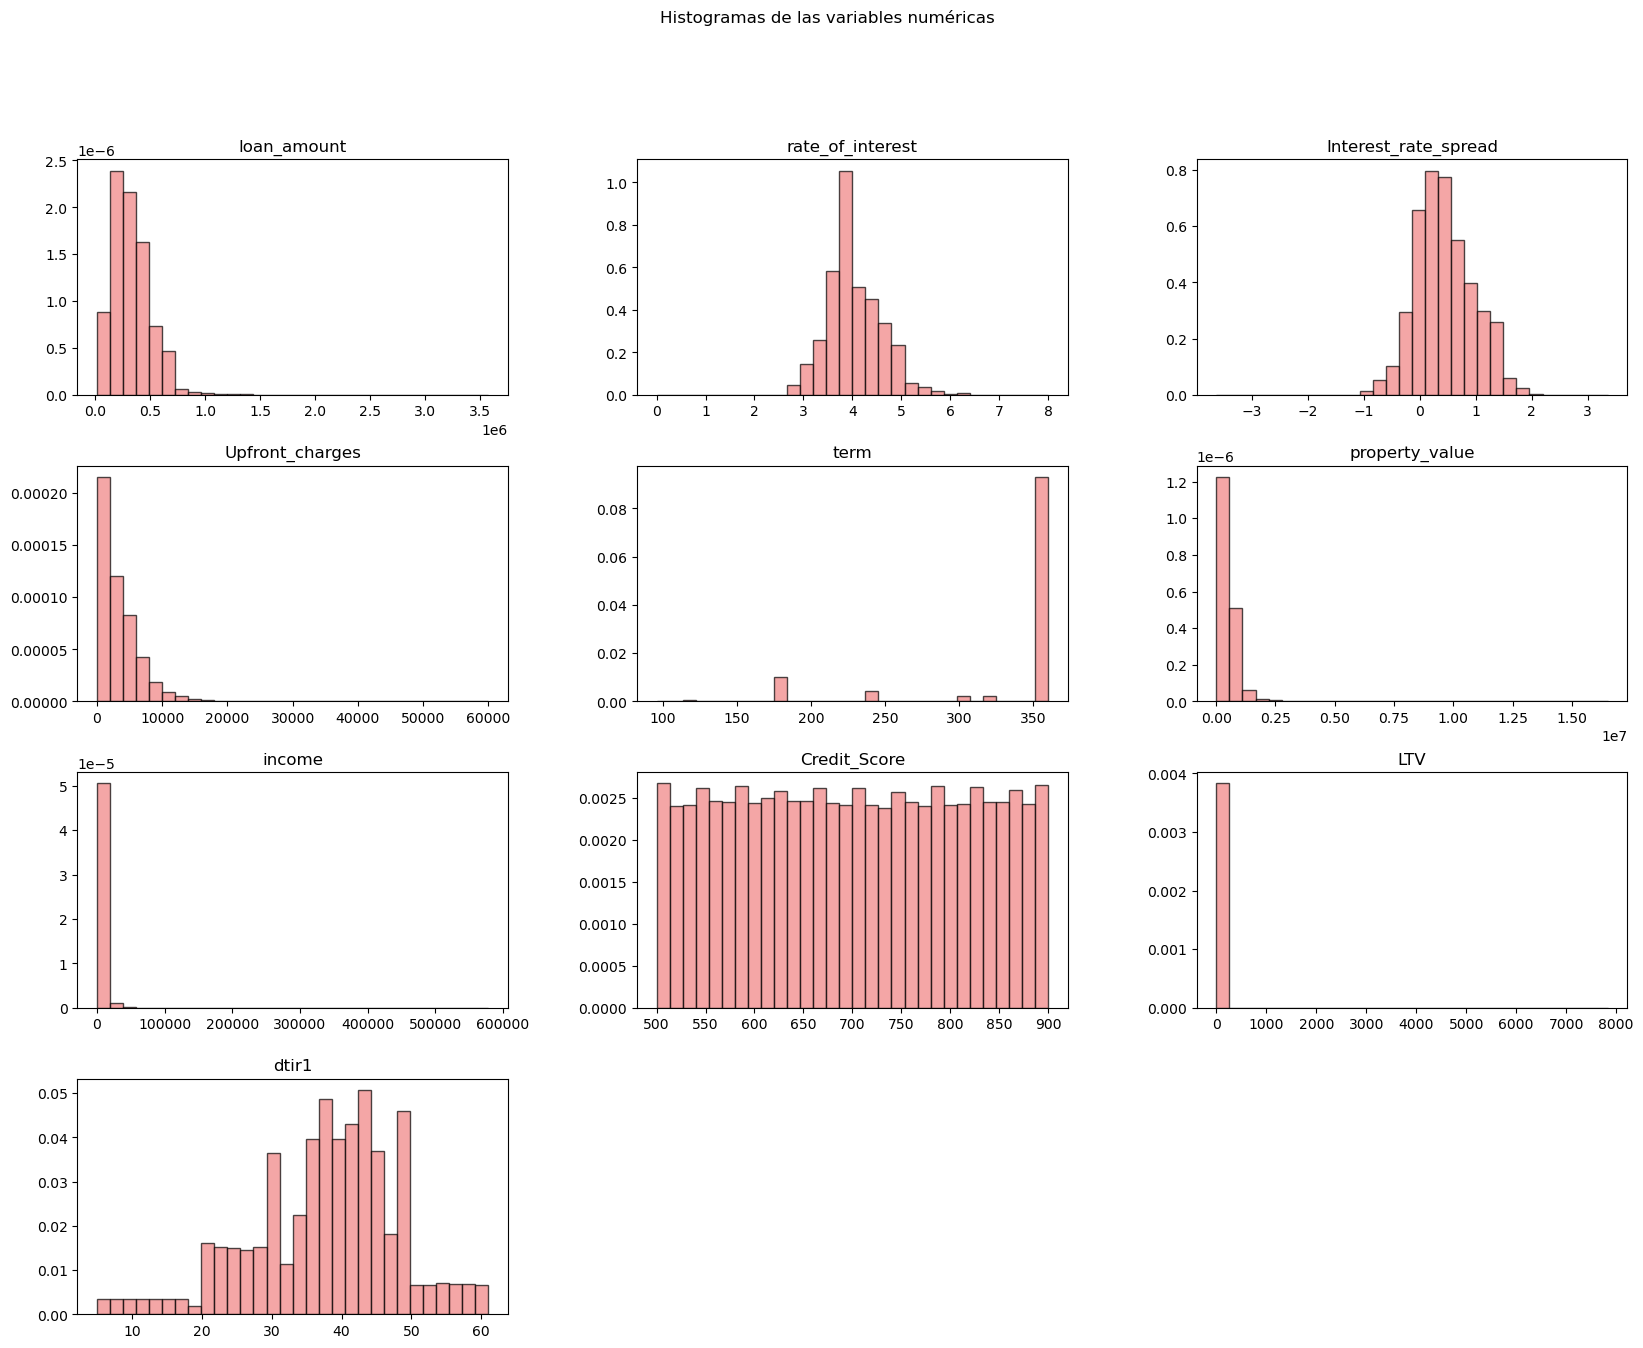

In [74]:
df[num_cols_wop_target].hist(bins=30, figsize=(20, 15), density=True, color='lightcoral', edgecolor='black', alpha=0.7, grid=False)
plt.suptitle('Histogramas de las variables numéricas')
plt.savefig('../reports/figures/2. Histogramas de las variables numéricas.svg')
plt.show()


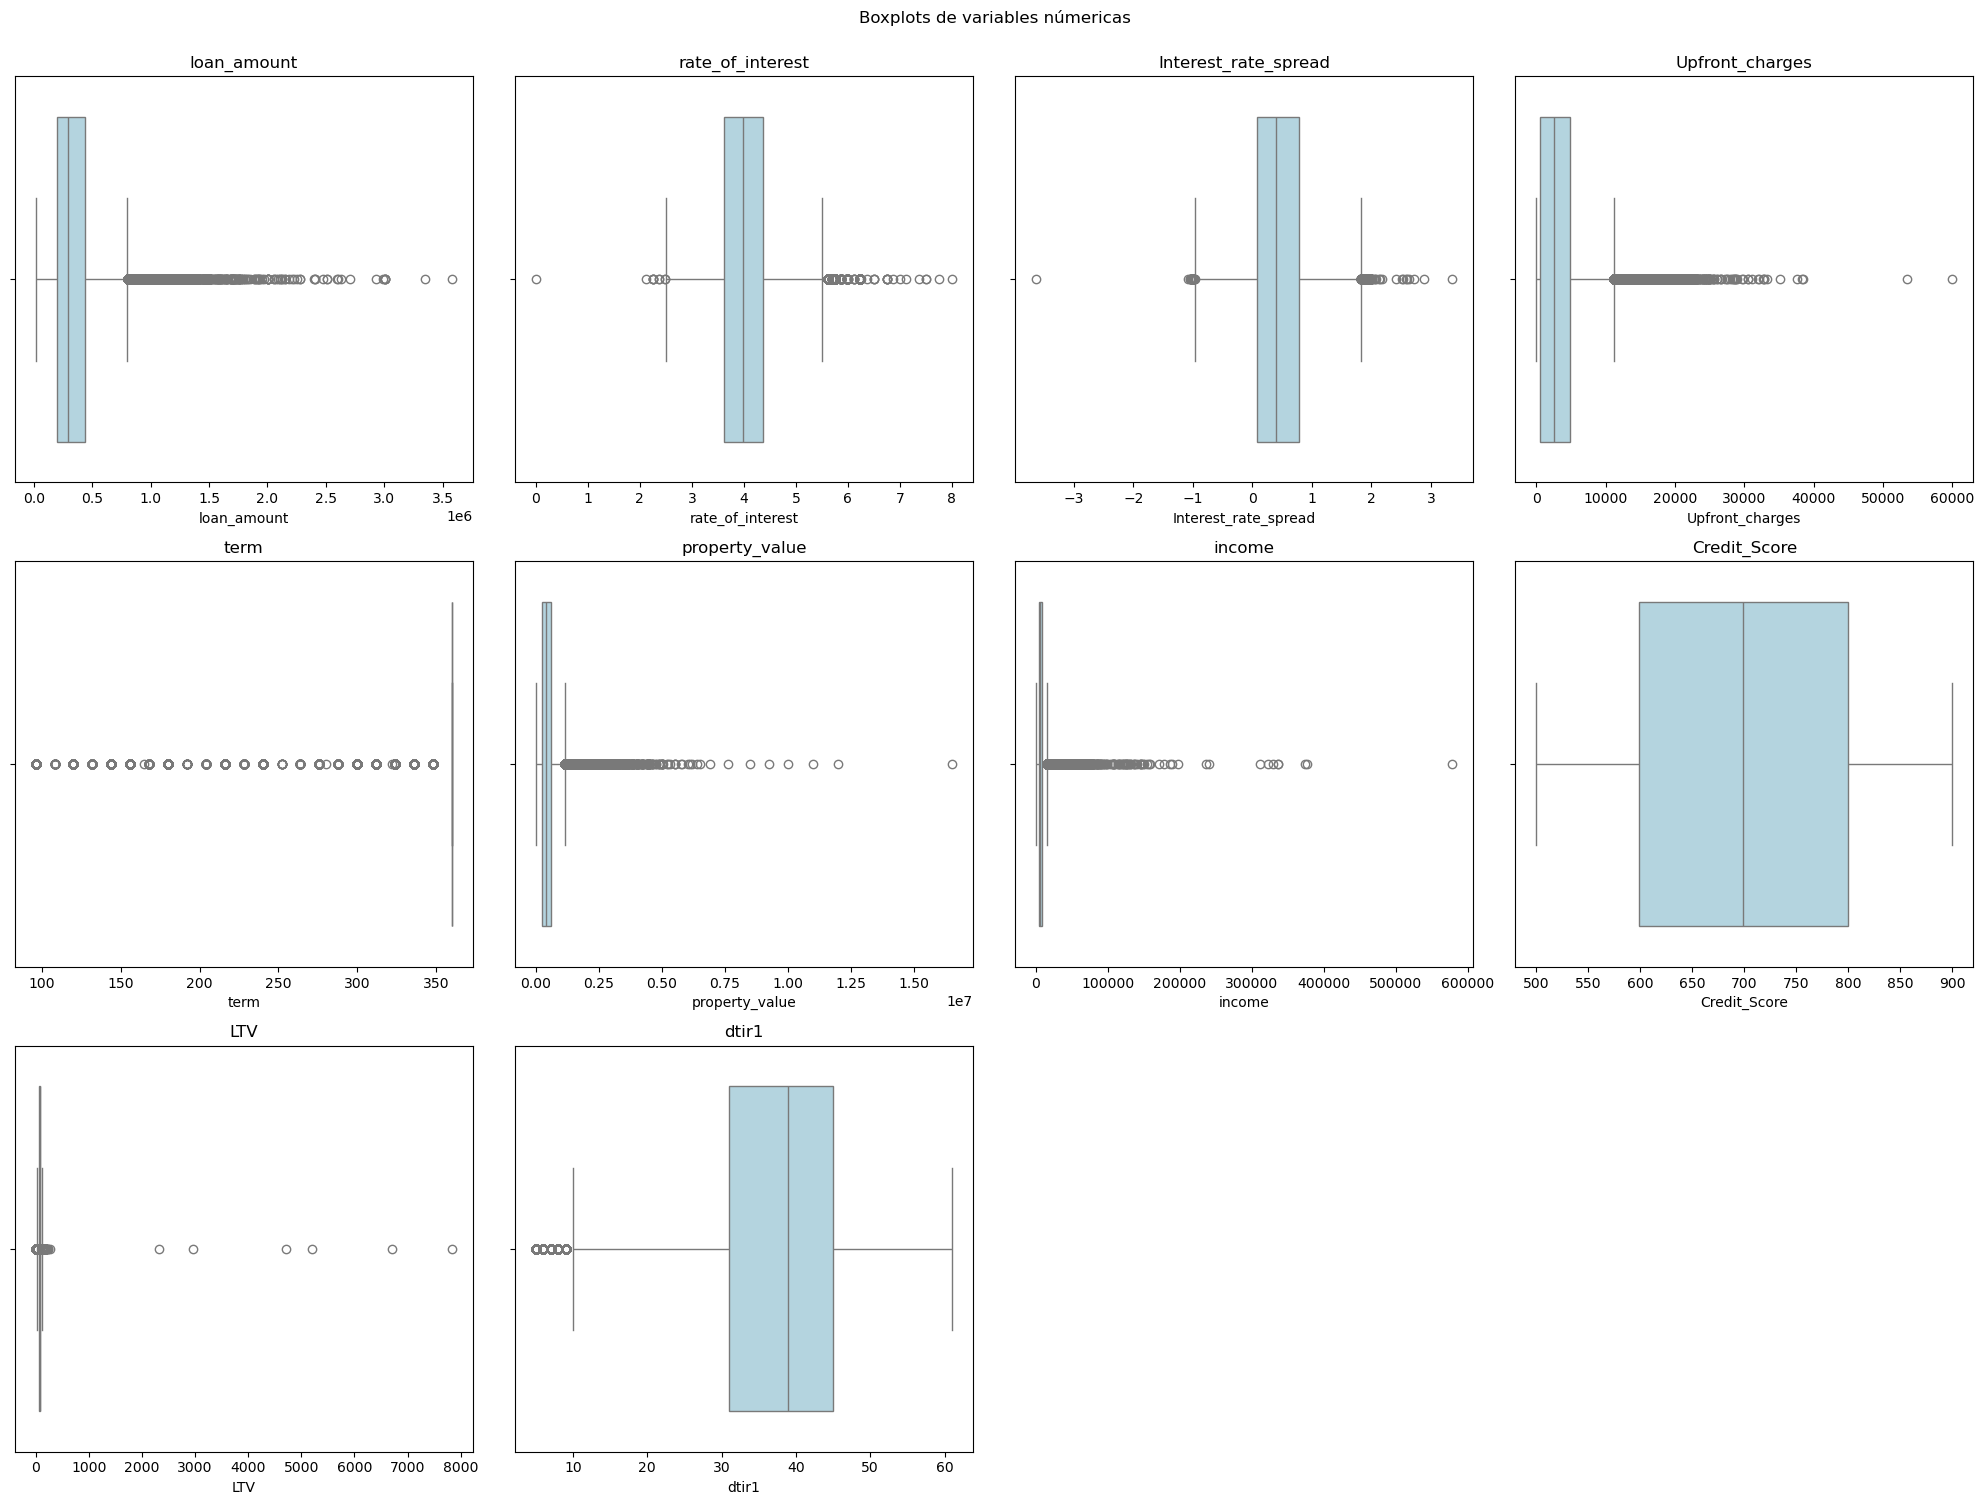

In [75]:
plt.figure(figsize=(20,15))
for i, col in enumerate(num_cols_wop_target, 1):
    plt.subplot(3,4, i)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(col)
plt.suptitle('Boxplots de variables númericas', y = 1)
plt.tight_layout()
plt.savefig('../reports/figures/3. Boxplots de variables númericas.svg')
plt.show()

<h3 style="text-align:center">Observaciones Tercera Parte 💡 (II)</h3>

* _loan_amount_.
    * La distribución de loan_amount sigue una distribución normal, pero está sesgada a la derecha. Esto significa que la mayoría de los importes de los préstamos se concentran en los importes más bajos. 
    * Esta variable muestra una elevada colinealidad con los ingresos, ya que el importe máximo de los préstamos suele decidirse en función de los límites de ingresos. En el mundo real, la distribución de los ingresos está siempre sesgada positivamente. Por lo tanto, no es sorprendente que la variable loan_amount también siga una distribución sesgada a la derecha.
    * En la sección de limpieza de datos, tenemos que considerar la estrategia adecuada para el manejo de los datos que faltan.

In [76]:
loan_amount_skewness = df['loan_amount'].skew()
print(f'Skewness of loan amount: {loan_amount_skewness:.2f}')
print(f"Percentage of Missing Values in rate_of_interest: {((df.shape[0]- df['rate_of_interest'].count())/ df.shape[0])*100:.2f}%")

Skewness of loan amount: 1.67
Percentage of Missing Values in rate_of_interest: 24.51%


* _rate_of_interest_ / _interest_rate_spread_
    * Existe una fuerte correlación positiva entre el diferencial de tipos de interés y el tipo de interés, lo que sugiere que los préstamos con intereses más altos también pueden tener diferenciales más altos.
    * El tipo de interés también sigue una distribución normal, al igual que el diferencial del tipo de interés.
    * Hay aproximadamente un 25% de valores perdidos en estas columnas. Por lo tanto, en la fase de limpieza de datos, debemos considerar una estrategia adecuada para tratarlos.
    * Un hecho a destacar es que, para _Interest_rate_spread_, la correlación con la variable objetivo es NaN. Esto requiere un análisis en profundidad.
    * _interest_rate_spread_ sólo tiene valores no ausentes para los registros con Estado = 0 (no impago). No se observan valores para Estado = 1 (por defecto). Este hecho limita la capacidad de la variable para predecir casos de impago y plantea problemas.
    * Tras imputar el valor de la mediana, la correlación entre _Interest_rate_spread_ y Status es de -0,04, lo que indica que tiene poca o ninguna relación lineal con la probabilidad de impago. Esto sugiere que el diferencial de tipos de interés no está directamente relacionado con el resultado del impago.
    * Riesgo potencial de fuga de datos: Dado que los valores de _Interest_rate_spread_ sólo se observan para los casos de no impago, la inclusión de esta característica puede introducir un sesgo, en particular cuando se imputan los valores que faltan para los casos de impago.
    * Falta la variable _rate_of_interest_ en todos los registros en los que Status = 1, lo que supone un total de 30.967 valores perdidos. Por el contrario, casi todos los valores que no faltan pertenecen a Status = 0, y sólo 163 casos tienen valores para Status = 1.
    * La correlación entre tasa de interés y estado era inicialmente de 0,023, lo que indica una relación muy débil. Después de imputar los valores que faltaban (con la mediana), la correlación pasó a -0,046, mostrando un impacto mínimo pero introduciendo una asociación ligeramente negativa.
    * Al igual que en _Interest_rate_spread_, cabe dudar de la filtración de datos también en esta característica.


In [77]:
rate_of_interest_skewness = df['rate_of_interest'].skew()
print(f"Skewness of rate_of_interest: {rate_of_interest_skewness:.2f}")
print(f"Percentage of Missing Values in rate_of_interest: {((df.shape[0]- df['rate_of_interest'].count())/ df.shape[0])*100:.2f}%")

Interest_rate_spread_skewness = df['Interest_rate_spread'].skew()
print(f"Skewness of Interest_rate_spread: {Interest_rate_spread_skewness:.2f}")
print(f"Percentage of Missing Values in Interest_rate_spread: {((df.shape[0]- df['Interest_rate_spread'].count())/ df.shape[0])*100:.2f}%")

Skewness of rate_of_interest: 0.39
Percentage of Missing Values in rate_of_interest: 24.51%
Skewness of Interest_rate_spread: 0.28
Percentage of Missing Values in Interest_rate_spread: 24.64%


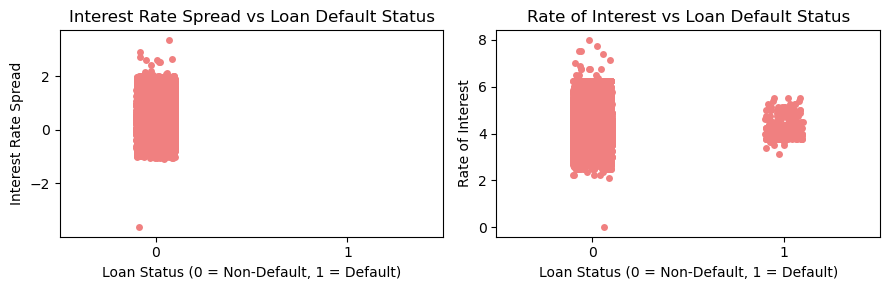

Interest Rate Spread Counts:  Status
0    112031
1         0
Name: Interest_rate_spread, dtype: int64


In [82]:
plt.figure(figsize=(9,3))

plt.subplot(1,2,1)
sns.stripplot(x='Status', y='Interest_rate_spread', data=df, jitter=True, color='lightcoral')
plt.title('Interest Rate Spread vs Loan Default Status')
plt.xlabel('Loan Status (0 = Non-Default, 1 = Default)')
plt.ylabel('Interest Rate Spread')

plt.subplot(1,2,2)
sns.stripplot(x='Status', y='rate_of_interest', data=df, jitter=True, color='lightcoral')
plt.title('Rate of Interest vs Loan Default Status')
plt.xlabel('Loan Status (0 = Non-Default, 1 = Default)')
plt.ylabel('Rate of Interest')

plt.tight_layout()
plt.savefig('../reports/figures/4. Interest Rate & Spread vs Loan Default Status.svg')
plt.show()

print("Interest Rate Spread Counts: ",df.groupby('Status')['Interest_rate_spread'].count())